In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [4]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [ ]:
# Create 3-d array of data
array_5d = 5*np.ones(243).reshape((3, 3, 3, 3, 3))

# Create tensor
tensor = Tensor(array_5d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 5 and consists of 243 elements.
Sizes and names of its modes are (3, 3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]]],


        [[[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]]],


        [[[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]]]],



       [[[[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]]],


        [[[5., 5., 5.],
          [5., 5., 5.],
          [5., 5., 5.]],

         [[5., 5., 5.],
    

In [8]:
# Calculate Frobenious norm
frob = np.linalg.norm(tensor.data)
print(frob)

77.94228634059948


### Solution: Part 2

In [ ]:
# Create tensors and collect information
tensor_elements = []
for i in range(3,21):
    # i dimensional tensor where each dimension has size 2 
    tensor = Tensor(np.ones(tuple(2*np.ones(i).astype('int'))))
    # number of elements = 2^i
    tensor_elements.append(2**i)

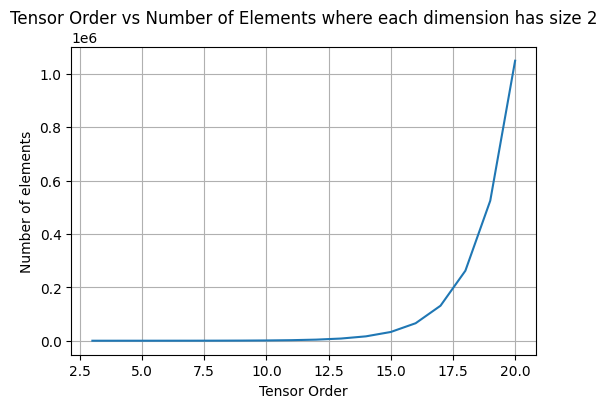

In [13]:
# Plot results
fig, ax = plt.subplots(figsize=(6,4))
ax.grid(True)
plt.plot(np.arange(3,21),tensor_elements)
plt.xlabel('Tensor Order')
plt.ylabel('Number of elements')
plt.title('Tensor Order vs Number of Elements where each dimension has size 2')
plt.show()


### Solution: Part 3

In [17]:
# Create tensors and collect information
tensor_elements = []
for i in range(3,15):
    # i dimensional tensor where each dimension has size 3
    tensor = Tensor(np.ones(tuple(i*np.ones(3).astype('int'))))
    # number of elements = i^3
    tensor_elements.append(i**3)

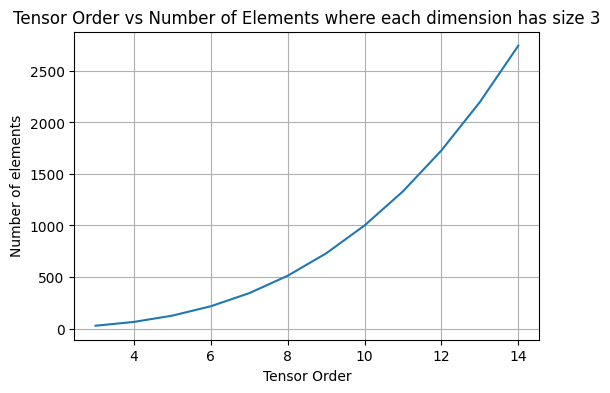

In [18]:
# Plot results
fig, ax = plt.subplots(figsize=(6,4))
ax.grid(True)
plt.plot(np.arange(3,15),tensor_elements)
plt.xlabel('Tensor Order')
plt.ylabel('Number of elements')
plt.title('Tensor Order vs Number of Elements where each dimension has size 3')
plt.show()

### Solution: Part 4

**Include comparison and analysis here**
In part 2, the number of elements is determined by the dimension of each tensor to the power of the order, an exponential growth dim^O. In part 3, the number of elements is determined by the order to the power of the dimension of each tensor, a polynomial growth O^dim. 
To accommodate for large data sizes, we either have to increase the number of dimensions in each tensor or the number of orders. The latter gives an explosion in the overall volume of data. Bellman described it as the 'Curse of Dimensionality'. As the number of dimensions increases, data points become sparser, distances become less meaningful, and models become harder to train efficiently. The memory needed to store such a tensor would also increase exponentially, which may be a scarce resource.


# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [ ]:
# Mode-2 fiber
tensor.data[0,1,:]

In [ ]:
# Frontal slice
tensor.data[0,:,:]

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [22]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor = Tensor(array_4d)

# # Result preview
# print(tensor)
# tensor.data

In [ ]:
# Display slices
for i in range(0,3): # each horizontal slice
    for j in range(0,3):  # each dimension 4
        print('Tensor Indexing: ({a},:,:,{b})'.format(a=i,b=j))
        print(tensor.data[i,:,:,j])

In [ ]:
# Display fibers
print(tensor.data[0,:,0,0]) # [0,:,0] row fibres for each 4th dimension 0
print(tensor.data[0,:,2,0]) # [0,:,2] row fibres for each 4th dimension 0
print(tensor.data[1,:,0,1]) # etc
print(tensor.data[1,:,2,1])
print(tensor.data[2,:,2,2])

### Solution: Part 2

In [ ]:
# Create a tensor of order 3
array_3d = np.arange(40).reshape((4, 2, 5))
tensor = Tensor(array_3d)

# # Result preview
# print(tensor)
# tensor.data

for i in range(0,tensor.shape[2]):
    tensor.data[:,:,i] = 2**i # doubling each iteration
    print(tensor.data[:,:,i])
    
# Result preview
print('Tensor Data')
print(tensor.data)

# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [34]:
# Create 4-d array of data
array_4d = np.arange(360).reshape((4, 3, 5, 6)) # only k=5 matters

# Create tensor
tensor = Tensor(array_4d)

In [ ]:
# Display unfolded version
tensor.unfold(mode=2)

# Result preview
print(tensor)
tensor.data

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [40]:
# Create original tensor 
I, J, K = 10, 4, 2
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)


In [ ]:
# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

In [ ]:
# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data


This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (10, 5, 2) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[  28,   34,   76,   82,  124,  130,  172,  178,  220,  226,  268,
         274,  316,  322,  364,  370,  412,  418,  460,  466],
       [  76,   98,  252,  274,  428,  450,  604,  626,  780,  802,  956,
         978, 1132, 1154, 1308, 1330, 1484, 1506, 1660, 1682],
       [ 124,  162,  428,  466,  732,  770, 1036, 1074, 1340, 1378, 1644,
        1682, 1948, 1986, 2252, 2290, 2556, 2594, 2860, 2898],
       [ 172,  226,  604,  658, 1036, 1090, 1468, 1522, 1900, 1954, 2332,
        2386, 2764, 2818, 3196, 3250, 3628, 3682, 4060, 4114],
       [ 220,  290,  780,  850, 1340, 1410, 1900, 1970, 2460, 2530, 3020,
        3090, 3580, 3650, 4140, 4210, 4700, 4770, 5260, 5330]])

In [43]:
# Validate equivalence between the left and right hand side
# i.e. checking if Y_n = A*X_n
copyY = Y
print("Checking Y")
print(copyY)

X = Tensor(array_3d)
AX = A@X.unfold(mode=1, inplace=False).data
print("Checking A*X")
print(AX)
np.allclose(AX, AX)

Checking Y
This tensor is of order 2 and consists of 100 elements.
Sizes and names of its modes are (5, 20) and ['mode-1', 'mode-0_mode-2'] respectively.
Checking A*X
[[  28   34   76   82  124  130  172  178  220  226  268  274  316  322
   364  370  412  418  460  466]
 [  76   98  252  274  428  450  604  626  780  802  956  978 1132 1154
  1308 1330 1484 1506 1660 1682]
 [ 124  162  428  466  732  770 1036 1074 1340 1378 1644 1682 1948 1986
  2252 2290 2556 2594 2860 2898]
 [ 172  226  604  658 1036 1090 1468 1522 1900 1954 2332 2386 2764 2818
  3196 3250 3628 3682 4060 4114]
 [ 220  290  780  850 1340 1410 1900 1970 2460 2530 3020 3090 3580 3650
  4140 4210 4700 4770 5260 5330]]


True

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [52]:
# Create tensor
I, J, K = 2, 3, 4

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

In [68]:
# Create matrices
J_A = 4
J_B = 3
A = np.arange(J_A * J).reshape(J_A, J)
B = np.arange(J_B * K).reshape(J_B, K)
# print(A)
# print(B)

In [69]:
# Validate property 1
XnAmB = X.mode_n_product(A, mode =1, inplace =False).mode_n_product(B, mode=2, inplace = False)
XmAnB = X.mode_n_product(B, mode =2, inplace =False).mode_n_product(A, mode=1, inplace = False)
np.allclose(XnAmB.data, XmAnB.data)

True

In [70]:
# Validate property 2
XnAnB = X.mode_n_product(A, mode =1, inplace =False).mode_n_product(B, mode=1, inplace = False)
XnBA = X.mode_n_product(B@A, mode =1, inplace =False)
np.allclose(XnAnB.data, XnBA.data)

True

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


Let $\mathbf{X} \in \mathbb{R}^{I_1 \times I_2 \times \cdots \times I_N}$ be an $N$-order tensor and $\mathbf{A} \in \mathbb{R}^{J \times I_n}$. The n-mode product is defined as

$$ (\mathbf{X} \times_{n} \mathbf{A})_{i_{1}\cdots i_{n-1}ji_{n+1}\cdots i_N} = \sum \limits_{i_n = 1}^{I_n} \mathbf{X}_{i_{1}i_{2}\cdots i_{n}\cdots i_{N}}\mathbf{A}_{ji_{n}} $$

This is not a standard product like the product of matrices. Although, you could perform a matricization of the tensor along its n-mode (dimension n) and allow it to be a standard multiplication.  
The n-mode matricization of $\mathbf{X}$, $\mathbf{X}_{(n)}$, is a $I_{n} \times I_{1}\cdots I_{n-1}I_{n+1}\cdots I_{N}$ matrix representation of  $\mathbf{X}$. So the multiplications are equivalent.

$$\mathbf{Y} = \mathbf{X} \times_{n} \mathbf{A} \iff \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)} $$

Where $\mathbf{Y}_{(n)}$ is the n-mode matricization of the tensor
$ \mathbf{Y} \in \mathbb{R}^{I_1 \times \cdots \times I_{n-1} \times J \times I_{n+1} \times \cdots \times I_N} $